In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [5]:
df = pd.read_csv("dataset/mnist_train.csv")
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#get digits between 0-4
df= df[df['label']<5]
df.tail()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
59985,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59991,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59994,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# get the features and target split
X= df.iloc[:,1:].values
y= df.iloc[:,0].values

In [8]:
# Normalize (optional)
X = X/255.0

In [9]:
#Split the training data

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.1, random_state=42)


In [10]:
# Load the test dataset

df_test = pd.read_csv("dataset/mnist_train.csv")
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_test = df_test[df_test["label"]<5]
X_test = df.iloc[:,1:].values/255.0
y_test = df.iloc[:,0].values

In [12]:
# Standardize (Optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



In [ ]:
# Training
mlp = MLPClassifier(hidden_layer_sizes=(16,32), alpha=0.001, batch_size=100, max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

train_error = 1- accuracy_score(y_train, mlp.predict(X_train))
val_error = 1- accuracy_score(y_val, mlp.predict(X_val))
test_err = 1 - accuracy_score(y_test, mlp.predict(X_test))
print("Part A Results:")
print(f"Training Error: {train_error:.4f}, Validation Error: {val_error:.4f}, Test Error: {test_err:.4f}, Epochs: {mlp.n_iter_}")



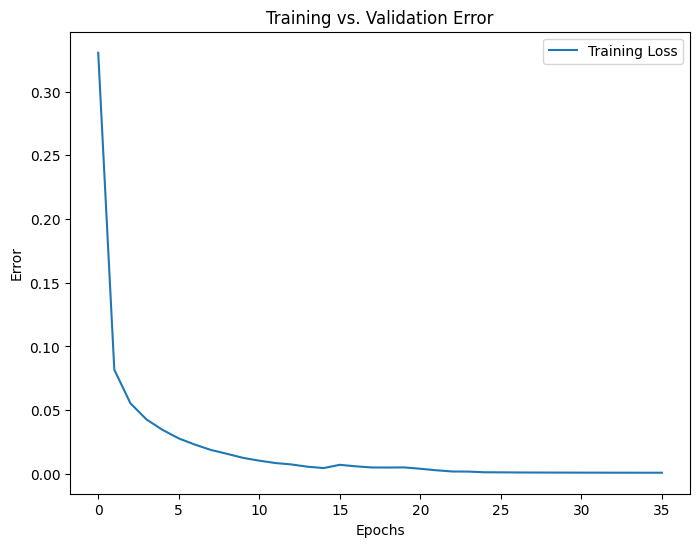

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(mlp.loss_curve_, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.title("Training Loss Curve")
plt.show()

In [16]:
# Testing
y_pred_test = mlp.predict(X_test)
test_error = 1-accuracy_score(y_test, y_pred_test)

print(f"Training Error: {train_error:.4f}")
print(f"Validation Error: {val_error:.4f}")
print(f"Test Error: {test_error:.4f}")

Training Error: 0.0000
Validation Error: 0.0154
Test Error: 0.0015


In [ ]:
# hyperparameter tuning
learning_rates= [0.0001, 0.001, 0.01, 0.1, 1.0]
batch_sizes = [10, 50, 100, 500, 1000]
hidden_layer_options = [(2, 5), (64, 128), (100, 100)]

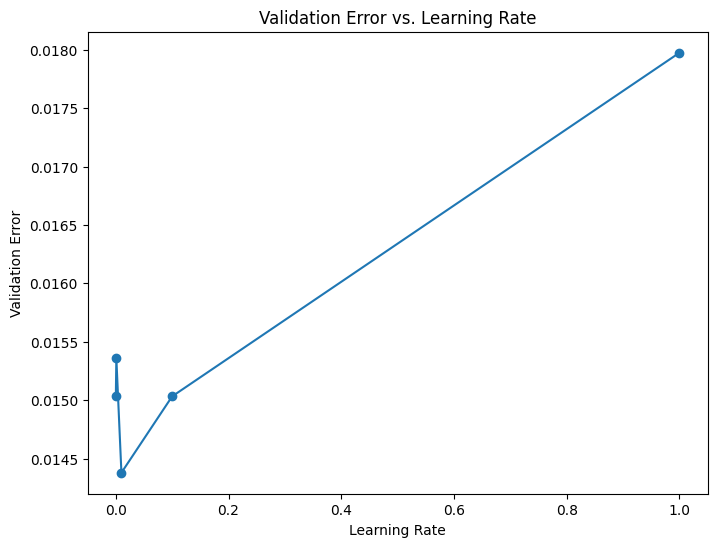

In [20]:
# Testing with different leanrning rates
best_mlp = None
best_val_error = float('inf')
best_learning_rate = None
errors=[]

for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(16,32), alpha=lr, batch_size=100, max_iter=1000, random_state=42)
    mlp.fit(X_train,y_train)
    val_error = 1- accuracy_score(y_val, mlp.predict(X_val))
    errors.append(val_error)
    if val_error< best_val_error:
        best_val_error = val_error
        best_mlp = mlp
        best_learning_rate = lr

plt.figure(figsize=(8,6))
plt.plot(learning_rates, errors, marker='o', linestyle='-')
plt.xlabel("Learning Rate")
plt.ylabel("Validation Error")
plt.title("Validation Error vs. Learning Rate")
plt.show()




In [21]:
# the best learning rate with the set parameters
print(f'The best learning rate is: {best_learning_rate}, with errror of: {best_val_error}')

The best learning rate is: 0.01, with errror of: 0.01437908496732021


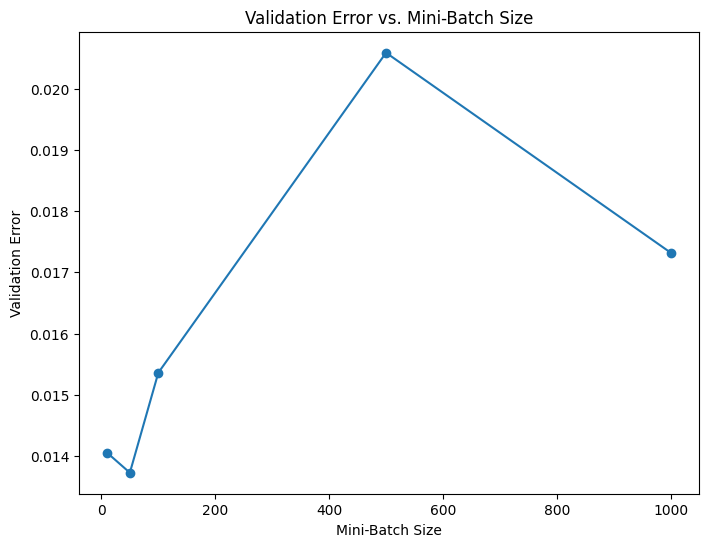

In [25]:
best_mlp = None
best_val_error = float('inf')
best_batch_size = None
errors = []

for bs in batch_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=(16, 32), alpha=0.001, batch_size=bs, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    val_error = 1 - accuracy_score(y_val, mlp.predict(X_val))
    errors.append(val_error)
    if val_error < best_val_error:
        best_val_error = val_error
        best_mlp = mlp
        best_batch_size = bs


plt.figure(figsize=(8, 6))
plt.plot(batch_sizes, errors, marker='o', linestyle='-')
plt.xlabel("Mini-Batch Size")
plt.ylabel("Validation Error")
plt.title("Validation Error vs. Mini-Batch Size")
plt.show()

In [26]:
# the best Batch size with the set parameters
print(f'The best Batch size is: {best_batch_size}, with errror of: {best_val_error}')

The best Batch size is: 50, with errror of: 0.013725490196078383


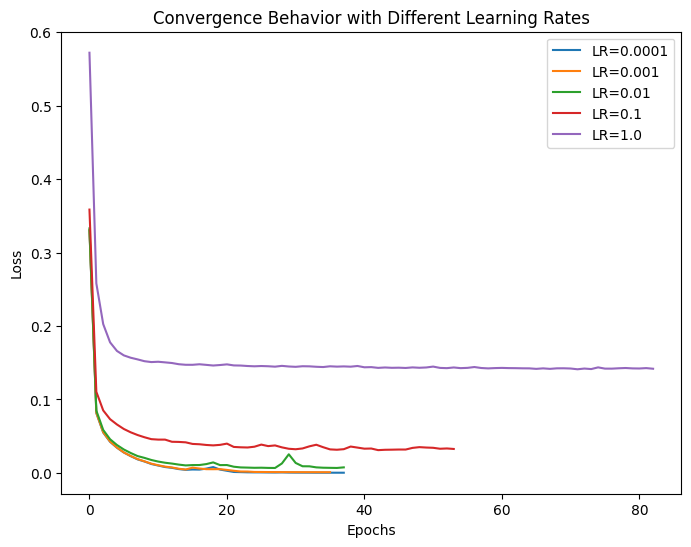

In [29]:
# Testing Different Learning Rates (Tracking Convergence)

best_lr = None
min_lr_epochs = float('inf')
plt.figure(figsize=(8, 6))
for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(16, 32), alpha=lr, batch_size=100, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    if mlp.n_iter_ < min_lr_epochs:
        min_lr_epochs = mlp.n_iter_
        best_lr = lr
    plt.plot(mlp.loss_curve_, label=f"LR={lr}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Convergence Behavior with Different Learning Rates")
plt.show()

In [44]:
print(f"Fastest Learning Rate: {best_lr} converged in {min_lr_epochs} epochs")


Fastest Learning Rate: 0.001 converged in 36 epochs


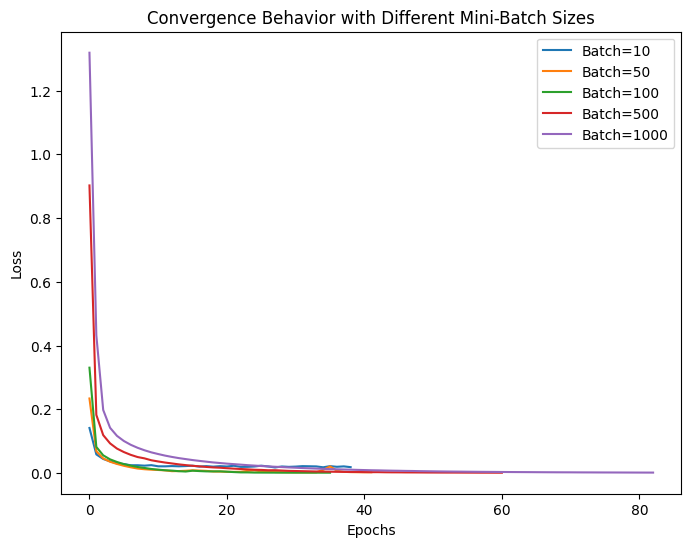

In [31]:
# Testing Different Mini-Batch Sizes (Tracking Convergence)

best_bs = None
min_bs_epochs = float('inf')
plt.figure(figsize=(8, 6))
for bs in batch_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=(16, 32), alpha=0.001, batch_size=bs, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    if mlp.n_iter_ < min_bs_epochs:
        min_bs_epochs = mlp.n_iter_
        best_bs = bs
    plt.plot(mlp.loss_curve_, label=f"Batch={bs}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Convergence Behavior with Different Mini-Batch Sizes")
plt.show()


In [43]:
print(f"Fastest Batch Size: {best_bs} converged in {min_bs_epochs} epochs")


Fastest Batch Size: 100 converged in 36 epochs


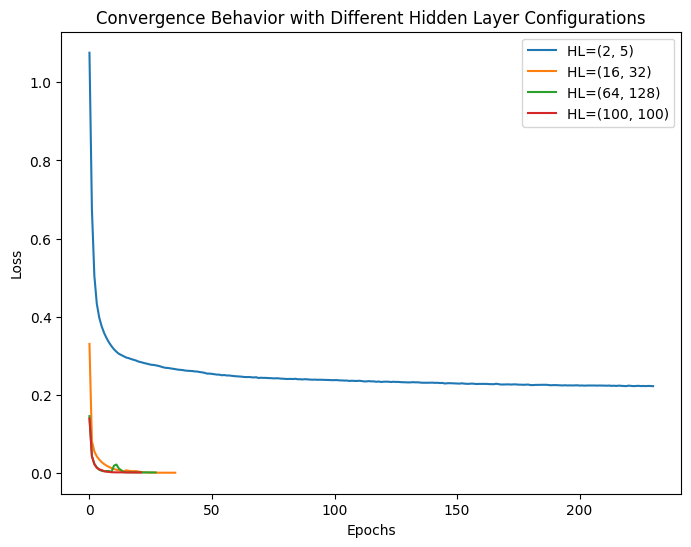

In [34]:
best_hl = None
min_hl_epochs = float('inf')
plt.figure(figsize=(8,6))
for hl in hidden_layer_options:
    mlp = MLPClassifier(hidden_layer_sizes= hl, alpha=0.001, batch_size=100, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    if mlp.n_iter_ < min_hl_epochs:
        min_hl_epochs = mlp.n_iter_
        best_hl = hl
    plt.plot(mlp.loss_curve_, label=f'HL={hl}')
    plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Convergence Behavior with Different Hidden Layer Configurations")
plt.show()


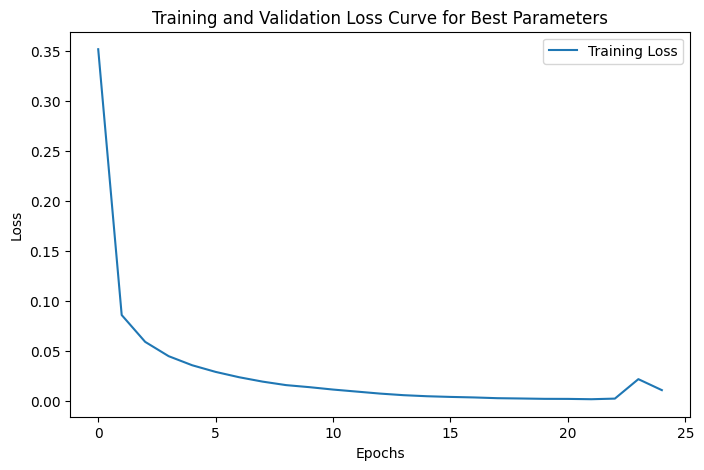

In [45]:
# best parameters

mlp_best = MLPClassifier(hidden_layer_sizes=(16, 32), alpha=0.001, batch_size=100, max_iter=1000, random_state=42, early_stopping=True)
mlp_best.fit(X_train, y_train)


train_error_best = 1 - accuracy_score(y_train, mlp_best.predict(X_train))
val_error_best = 1 - accuracy_score(y_val, mlp_best.predict(X_val))
plt.figure(figsize=(8, 5))
plt.plot(mlp_best.loss_curve_, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Curve for Best Parameters")
plt.show()

In [46]:
# Evaluate Best Model on Test Set
y_pred_test_best = mlp_best.predict(X_test)
test_error_best = 1 - accuracy_score(y_test, y_pred_test_best)

In [47]:
# Print Errors for Best Model
print(f"Best Model - Training Error: {train_error_best:.4f}")
print(f"Best Model - Validation Error: {val_error_best:.4f}")
print(f"Best Model - Test Error: {test_error_best:.4f}")
print(f"Best Model - Iterations: {mlp_best.n_iter_}")

Best Model - Training Error: 0.0022
Best Model - Validation Error: 0.0157
Best Model - Test Error: 0.0036
Best Model - Iterations: 25


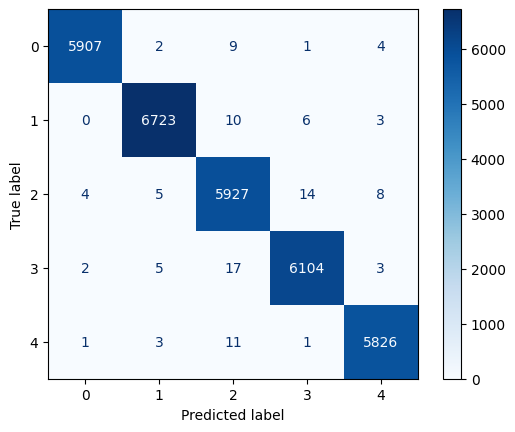

In [48]:
# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_test_best)
display_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=[0, 1, 2, 3, 4])
display_best.plot(cmap="Blues")
plt.show()